# 차원축소 Assignment2

## MNIST data에 적용을 해보기 (╹◡╹)

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [27]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

In [3]:
# 데이터 정보!
# 7만개의 작은 숫자 이미지
# 행 열이 반대로 되어있음 -> 전치
# grayscale 28x28 pixel = 784 feature
# 각 picel은 0~255의 값
# label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

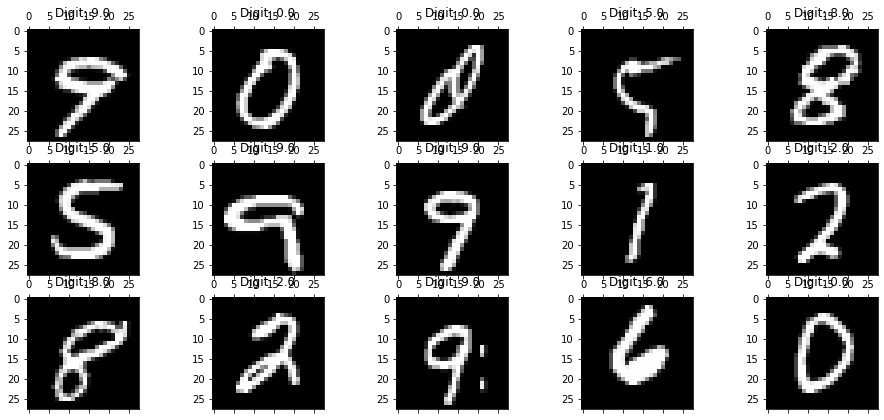

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!
강의에서 배웠던 3가지 중 어떤 걸 고려하였는지요! 
scree plot같은거는 직접 그려봐도 좋겠죠 ㅎㅎㅎ

주성분의 개수를 결정하기위해 고려해야하는것!!
1. Elbow point : 곡선의 기울기가 급격히 감소하는 지점
2. Kaiser’s Rule : 고유값 1 이상의 주성분들
3. 누적설명률이 70%~80% 이상인 지점

In [43]:
#차원축소를 하기전에 scaling먼저 실행!
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

* PCA의 주성분개수 정하기

In [44]:
#먼저 누적성명률이 70~80이상인 지점을 고려해보자
#0 < n_components <1 이면, 설명해야하는 분산의 양이 지정된 백분율보다 크도록 수를 선택한다.

pca = PCA(n_components = 0.8)
pca.fit(X_train_std,y_train) # scaling한 데이터를 집어넣어준다
print(pca.n_components_)

147


In [45]:
pca = PCA(n_components = 0.7)
pca.fit(X_train_std,y_train)
print(pca.n_components_)

97


In [46]:
pca = PCA(n_components = 0.75)
pca.fit(X_train_std,y_train)
print(pca.n_components_)

119


* 97~147 사이의 개수가 적당하다고 판단하였다.

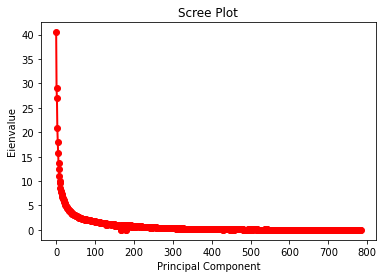

In [15]:
#그다음 Elbow point를 확인해보려고한다.
cov_train = np.cov(X_train_std.T) #공분산 계산
eig_vals_train, eig_vecs_train = np.linalg.eig(cov_train) # 고유값 계산 

vals = np.arange(len(eig_vals_train))
plt.plot(vals, eig_vals_train, "ro-", linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eienvalue")
plt.show()

* 100개 근처에서 기울기가 급격히 감소하는 현상을 볼 수 있다.
* 따라서 pca의 주성분 개수는 119으로 하는것이 적당하다고 판단하였다.

* LDA의 주성분 개수 정하기

In [90]:
#LDA의 누적설명률 구하기 
# cumsum : 배열에서 주어진 축에 따라 누적되는 원소들의 누적 합을 계산하는 함수.
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_std,y_train)

cumsum = np.cumsum(lda.explained_variance_ratio_)
d= np.argmax(cumsum >= 0.75) #누적설명률이 70~80사이어야하니까 0.75정도 이상되는 값을 찾는다
print('차원의 수 : ' , d)

C:\Users\Cute\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


차원의 수 :  4


* 정리하자면, PCA의 주성분 개수는 119개, LDA의 주성분 개수는 4개로 정하였다!

In [47]:
#pca
pca = PCA(n_components = 119)
pca.fit(X_train_std)

PCA(n_components=119)

In [48]:
#위에서 fit을 했으니까 transform만 적용한 PCA 데이터 새로 만들기
X_pca_train = pca.transform(X_train_std)
X_pca_test = pca.transform(X_test_std)

In [50]:
#lda
lda = LDA(n_components=4)
lda.fit(X_train_std,y_train)

C:\Users\Cute\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis(n_components=4)

In [51]:
#마찬가지로 lda적용한 데이터 새로만들기 
X_lda_train = lda.transform(X_train_std)
X_lda_test = lda.transform(X_test_std)

### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

### 1. DecisionTree 사용!

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [74]:
#scaling한 원본 데이터 사용
dt = DecisionTreeClassifier()
dt.fit(X_train_std, y_train)

pred = dt.predict(X_test_std)
print(accuracy_score(pred, y_test))

0.8731428571428571


In [75]:
#PCA 축소를 사용한 데이터
dt = DecisionTreeClassifier()
dt.fit(X_pca_train, y_train)

pred = dt.predict(X_pca_test)
print(accuracy_score(pred, y_test))

0.8348571428571429


In [76]:
#LDA축소를 사용한 데이터
dt = DecisionTreeClassifier()
dt.fit(X_lda_train, y_train)

pred = dt.predict(X_lda_test)
print(accuracy_score(pred, y_test))

0.7559285714285714


* PCA와 LDA를 적용했을때 정확도가 더떨어졌다. Decision Tree는 차원축소가 안맞는 모델인것같다!

### 2. SVM 사용!

In [84]:
#scaling한 원본 데이터 사용
svc= svm.SVC()
svc.fit(X_train_std, y_train)

pred = svc.predict(X_test_std)
print(accuracy_score(pred, y_test))

C:\Users\Cute\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9645714285714285


In [85]:
#PCA 축소를 사용한 데이터
svc = svm.SVC()
svc.fit(X_pca_train, y_train)

pred = svc.predict(X_pca_test)
print(accuracy_score(pred, y_test))

C:\Users\Cute\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.971


In [86]:
#LDA축소를 사용한 데이터
svc = svm.SVC()
svc.fit(X_lda_train, y_train)

pred = svc.predict(X_lda_test)
print(accuracy_score(pred, y_test))

C:\Users\Cute\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8323571428571429


* SVM에 PCA축소를 적용했을때 정확도가 0.971로 높게나왔다! 

### 3. KNN 사용!

In [87]:
#scaling한 원본 데이터 사용
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_std, y_train)

pred = knn.predict(X_test_std)
print(accuracy_score(pred, y_test))

<ipython-input-87-a4d1f026a6ff>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train_std, y_train)


0.9462857142857143


In [88]:
#PCA 축소를 사용한 데이터
knn = KNeighborsClassifier()
knn.fit(X_pca_train, y_train)

pred = knn.predict(X_pca_test)
print(accuracy_score(pred, y_test))

<ipython-input-88-f744acf0eee4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_pca_train, y_train)


0.9581428571428572


In [89]:
#LDA축소를 사용한 데이터
knn = KNeighborsClassifier()
knn.fit(X_lda_train, y_train)


pred = knn.predict(X_lda_test)
print(accuracy_score(pred, y_test))

<ipython-input-89-c49cf484a8db>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_lda_train, y_train)


0.8173571428571429


* KNN 또한 PCA축소를 적용했을때 정확도가 0.958로 높게나왔다!

### 4. Random Forest 사용!

In [78]:
#scaling한 원본 데이터 사용
rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)

pred = rf.predict(X_test_std)
print(accuracy_score(pred, y_test))

<ipython-input-78-45ba45b6dce1>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_std, y_train)


0.9689285714285715


In [79]:
#PCA 축소를 사용한 데이터
rf = RandomForestClassifier()
rf.fit(X_pca_train, y_train)

pred = rf.predict(X_pca_test)
print(accuracy_score(pred, y_test))

<ipython-input-79-6401fe52ab30>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_pca_train, y_train)


0.9427857142857143


In [80]:
#LDA축소를 사용한 데이터
rf = RandomForestClassifier()
rf.fit(X_lda_train, y_train)

pred = rf.predict(X_lda_test)
print(accuracy_score(pred, y_test))

<ipython-input-80-0dd4cb75ee7d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_lda_train, y_train)


0.825


* Random Forest에는 PCA,LDA 축소법이 잘맞지 않는 것 같다! 축소법을 적용하지 않은 원본데이터를 사용했을때 정확도가 0.968로 나왔다!

### 정리 
1. 차원축소를 적용하면 정확도가 올라갈 줄 알았는데, 어떤모델을 적용하느냐에 따라 달랐다. 
2. 또한 dt,svm,kmm,rf에 축소법을 적용할경우, LDA보다는 PCA축소법이 이 데이터에는 잘 맞는것 같다.
3. 정확도가 가장 높은 모델은 0.971인 PCA축소법을 적용한 SVM이 가장 높게나왔다!

## 가장 높은 test accuracy가 나오신 분께 이모티콘 선물 드릴게요 ٩(๑❛ᴗ❛๑)۶